# Problem statement

We want to create a classifier to predict what crop is the best given some agro-climatic conditions. The data that the dataset contain is:

Features (Inputs):
- N – Nitrogen content in the soil (in mg/kg)
- P – Phosphorus content in the soil (in mg/kg)
- K – Potassium content in the soil (in mg/kg)
- temperature – Average temperature in °C
- humidity – Average relative humidity in %
- ph – Soil pH value
- rainfall – Rainfall in mm

Label (Output):
- label – The crop most suited to the given conditions (e.g., rice, maize, cotton, etc.)

# Analysis of the data

## Get the data

In [1]:
import kagglehub
from dotenv import load_dotenv

# load the environment variables from .env file
load_dotenv()

# download the latest version of the dataset
path = kagglehub.dataset_download("madhuraatmarambhagat/crop-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: ../.\datasets\madhuraatmarambhagat\crop-recommendation-dataset\versions\1


Now load the data as a pandas dataframe

In [2]:
import pandas as pd

path_to_data = '../datasets/madhuraatmarambhagat/crop-recommendation-dataset/versions/1/Crop_recommendation.csv'
df = pd.read_csv(path_to_data)

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Separate in train and test sets

We are going to separate the data in train and test before the study to not create any bias in the analysis.

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
data = pd.concat([X_train, y_train], axis=1)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1656,17,16,14,16.396243,92.181519,6.625539,102.944161,orange
752,37,79,19,27.543848,69.347863,7.143943,69.408782,blackgram
892,7,73,25,27.521856,63.132153,7.288057,45.208411,lentil
1041,101,70,48,25.360592,75.031933,6.012697,116.553145,banana
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,mango


## Checking the target

We are going to study the distribution of the target variable.

In [7]:
crop_distribution = data.value_counts("label").reset_index()
crop_distribution

,label,count
0,lentil,89
1,grapes,86
2,orange,86
3,cotton,83
4,coffee,83
5,muskmelon,83
6,rice,81
7,mungbean,81
8,watermelon,81
9,mango,81


In [8]:
import plotly.express as px


fig = px.pie(crop_distribution, values='count', names='label', title='Crop distribution', width=800, height=650)
fig.show()

We can see that all the classes are well distributed (balanced) so we can use accuracy as the metric for the model.

## Checking the features

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# create the histograms
fig1 = px.histogram(data, x="N")
fig2 = px.histogram(data, x="P")
fig3 = px.histogram(data, x="K")
fig4 = px.histogram(data, x="temperature")
fig5 = px.histogram(data, x="humidity")
fig6 = px.histogram(data, x="ph")
fig7 = px.histogram(data, x="rainfall")

# create subplots
fig = make_subplots(
    rows=4,
    cols=4,
    subplot_titles=(
        "N histogram", "P histogram", "K histogram", "Temperature histogram",
        "N box", "P box", "K box", "Temperature box",
        "Humidity histogram", "Ph histogram", "Rainfall histogram",
        "", "Humidity box", "Ph box", "Rainfall box"
    )
)

# creating a multiple figure with histograms and box plots
fig.add_trace(fig1.data[0],row=1, col=1)
fig.add_trace(go.Box(x=data["N"], name='N box', marker_color='green'), row=2, col=1)

fig.add_trace(fig2.data[0],row=1, col=2)
fig.add_trace(go.Box(x=data["P"], name='P box', marker_color='green'), row=2, col=2)

fig.add_trace(fig3.data[0],row=1, col=3)
fig.add_trace(go.Box(x=data["K"], name='K box', marker_color='green'), row=2, col=3)

fig.add_trace(fig4.data[0],row=1, col=4)
fig.add_trace(go.Box(x=data["temperature"], name='Temperature box', marker_color='green'), row=2, col=4)

fig.add_trace(fig5.data[0],row=3, col=1)
fig.add_trace(go.Box(x=data["humidity"], name='Humidity box', marker_color='green'), row=4, col=1)

fig.add_trace(fig6.data[0],row=3, col=2)
fig.add_trace(go.Box(x=data["ph"], name='Ph box', marker_color='green'), row=4, col=2)

fig.add_trace(fig7.data[0],row=3, col=3)
fig.add_trace(go.Box(x=data["rainfall"], name='Rainfall box', marker_color='green'), row=4, col=3)


fig.update_layout(height=1000, width=1400, title_text="Features analysis")
fig.show()

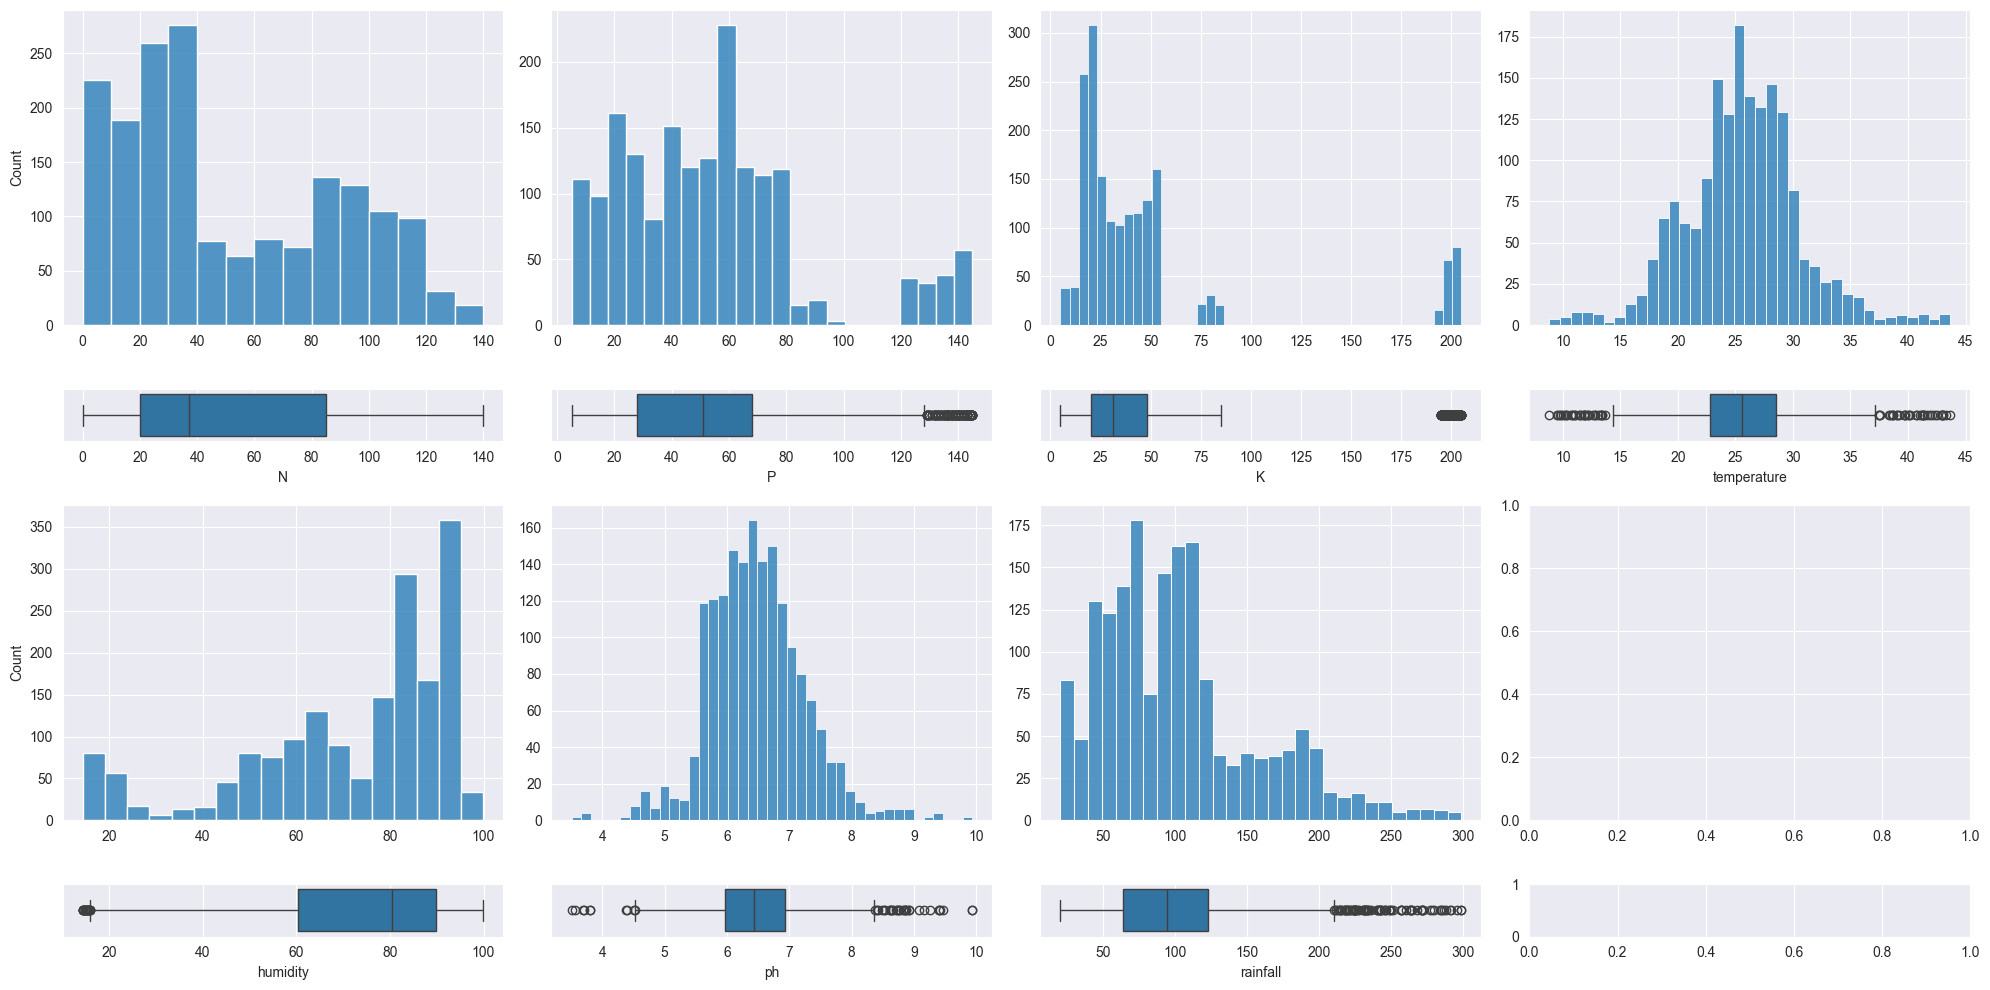

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


_, axis = plt.subplots(4, 4, figsize=(20, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

"""
Create histograms and box-plots for each numerical feature.
"""

# creating a multiple figure with histograms and box plots
# first row
# 	 col
sns.histplot(ax=axis[0, 0], data=data, x="N").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=data, x="N")
# 	second col
sns.histplot(ax=axis[0, 1], data=data, x="P").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=data, x="P")
# 	third col
sns.histplot(ax=axis[0, 2], data=data, x="K").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=data, x="K")
# 	forth col
sns.histplot(ax=axis[0, 3], data=data, x="temperature").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 3], data=data, x="temperature")

# second row
# 	 col
sns.histplot(ax=axis[2, 0], data=data, x="humidity").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=data, x="humidity")
# 	second col
sns.histplot(ax=axis[2, 1], data=data, x="ph").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=data, x="ph")
# 	third col
sns.histplot(ax=axis[2, 2], data=data, x="rainfall").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 2], data=data, x="rainfall")


# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

We can see that the temperature and the ph follows a normal distributions, with some outliers at the bottom and top end. While the others follows another type of distributions. We can see that the feature K is the one with the most marked outliers. We are going to use a standard scaler for treating the outliers in the features.

## Scaling the data

Now we scale the features

In [11]:
from sklearn.preprocessing import StandardScaler

# create the scaler
scaler = StandardScaler()

# fit the scaler and transform the train adn test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Encoding the target feature

Encode the target feature to be a numerical label, for this we are going to use the sklearn label encoder.

In [12]:
from sklearn.preprocessing import LabelEncoder


# initialize the label encoder
le = LabelEncoder()

# adjust and transform the training and test targets
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

Saving the feature scaler and the target encoder

In [15]:
import joblib

# save the models as pickle files
joblib.dump(scaler, '../models/scaler.pkl')
joblib.dump(le, '../models/encoder.pkl')

['../models/encoder.pkl']

# Creating the logistic regression model

We can rewrite everything as pipeline, we can put the scaler inside the pipeline. In this wa we ensure that we are not doing data leakage and we can save everything together in just one model.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


# create the pipeline, with a standard scaler from zero
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [17]:
from sklearn.model_selection import GridSearchCV


# C values to test
C_values = [0.01, 0.1, 1, 10, 100]

# param grid
param_grid = [
    # 'lbfgs', 'newton-cg', 'sag' solvers
    # these solvers support 'l2' and None (without) regularization
    {
        'classifier__solver': ['lbfgs', 'newton-cg', 'sag'],
        'classifier__penalty': ['l2', None],
        'classifier__C': C_values,
    },
    # 'saga' solver
    # this solver support 'l1', 'l2', 'elasticnet' and None (without) regularization
    {
        'classifier__solver': ['saga'],
        'classifier__penalty': ['l1', 'l2', None],
        'classifier__C': C_values,
    },
    {
        'classifier__solver': ['saga'],
        'classifier__penalty': ['elasticnet'],
        'classifier__C': C_values,
        # set 'l1-ratio' on this solver, because of the penalty used
        'classifier__l1_ratio': [0.2, 0.5, 0.8],
    }
]

# grid search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
)

Now fit the grid search to get the best model.

**Important considerations**
- **X_train**: should be the original data without being scale, that is going to be done by the scaler in the pipeline
- **y_train**: should be the encoded one

In [18]:
# fit the grid
grid_search.fit(X_train, y_train_encoded)

F:\Courses\4GeeksAcademy\DataScience\DeliverableExercises\alejandroNovellino-ml-backend-poject\.venv\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning:

The number of unique classes is greater than 50% of the number of samples.

F:\Courses\4GeeksAcademy\DataScience\DeliverableExercises\alejandroNovellino-ml-backend-poject\.venv\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning:

The number of unique classes is greater than 50% of the number of samples.

F:\Courses\4GeeksAcademy\DataScience\DeliverableExercises\alejandroNovellino-ml-backend-poject\.venv\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning:

The number of unique classes is greater than 50% of the number of samples.

F:\Courses\4GeeksAcademy\DataScience\DeliverableExercises\alejandroNovellino-ml-backend-poject\.venv\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning:

The number of unique classes is greater than 50% of the number of samples.

F:\Courses\4GeeksAcademy\DataScience

,estimator,Pipeline(step..._iter=1000))])
,param_grid,"[{'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l2', None], 'classifier__solver': ['lbfgs', 'newton-cg', ...]}, {'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l1', 'l2', ...], 'classifier__solver': ['saga']}, ...]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


## Get the best model

Get the best model obtained from the gridsearch training

In [19]:
grid_search.best_params_

{'classifier__C': 10,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [20]:
# get the best stimator
model = grid_search.best_estimator_

## Performance of the model

Do the predictions, for testing the performance

In [21]:
# predict the values, we use the original values thanks to the pipeline
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

### Metrics

We are going to see the performance of the model with accuracy, precision, recall and f1-score (in macro and micro) to see the performance in all the classes.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# metrics

# accuracy
acc = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {acc:.4f}")

# for precision, recall and f1-score, we can use 'macro' o 'weighted' for the average of the classes
# 'macro': simple average by class
# 'weighted': wighted average for each class
print(f"Precision (macro): {precision_score(y_test_encoded, y_pred, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test_encoded, y_pred, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test_encoded, y_pred, average='macro'):.4f}")

print(f"\nPrecision (weighted): {precision_score(y_test_encoded, y_pred, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test_encoded, y_pred, average='weighted'):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test_encoded, y_pred, average='weighted'):.4f}")

Accuracy: 0.9682
Precision (macro): 0.9666
Recall (macro): 0.9703
F1-Score (macro): 0.9676

Precision (weighted): 0.9693
Recall (weighted): 0.9682
F1-Score (weighted): 0.9680


### Performance with each class

In [23]:
# --- Reporte de Clasificación ---
print("\nClassification Report (Multiclass):\n", classification_report(y_test_encoded, y_pred, target_names=le.classes_))


Classification Report (Multiclass):
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

### Confusion matrix

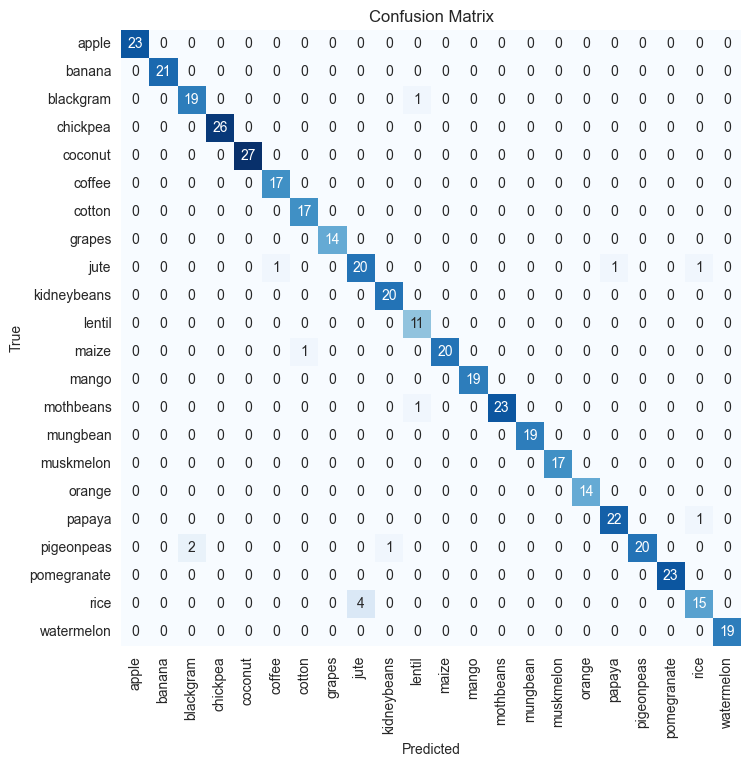

In [24]:
# calculate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# graph the cm
plt.figure(figsize=(8, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

We can see that the model has an excellent performance for all the classes, with an accuracy of 96%.

# Save the model

In [27]:
joblib.dump(model, '../models/model.pkl')

['../models/model.pkl']